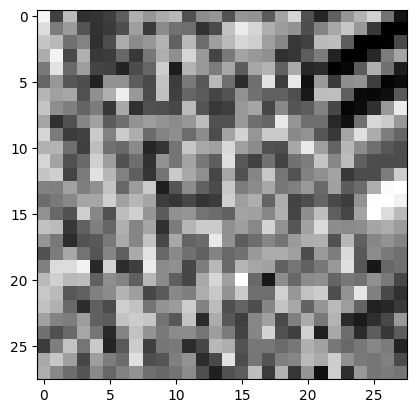

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Örnek veri seti
data = {'Feature1': [1, 2, np.nan, 4, 5],
        'Feature2': [7, np.nan, 9, 10, 11],
        'Feature3': [12, 13, 14, np.nan, 16]}

df = pd.DataFrame(data)

# Ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Min-max scaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

# Standartlaştırma (Ortalama 0, Standart sapma 1)
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_filled), columns=df.columns)

#Veri artırma
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# görüntü oluşturma rastgele
image = np.random.rand(28, 28, 1)  # Gri tonlama görüntüsü
image = np.expand_dims(image, 0)  # tensor haline getirme

# Görüntüyü artırma
datagen.fit(image)

# görselleştirme
for batch in datagen.flow(image, batch_size=1):
    plt.imshow(batch[0].reshape(28, 28), cmap='gray')
    plt.show()
    break
